In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
iris_df = sns.load_dataset('iris')
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

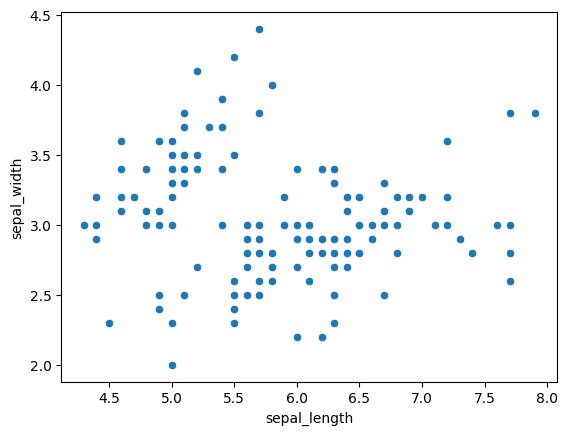

In [5]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'sepal_width')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

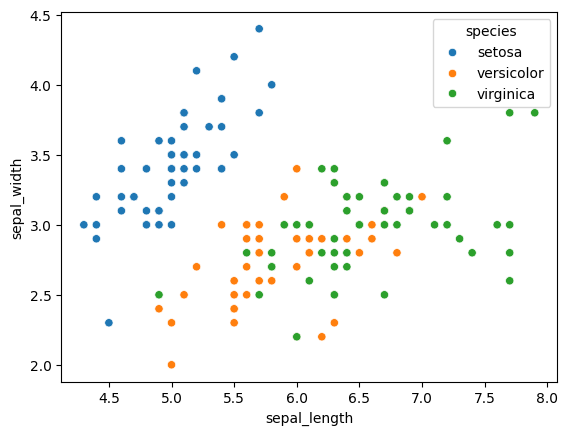

In [6]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'sepal_width', hue = 'species')

In [10]:
iris_df2 = iris_df[['sepal_length', 'sepal_width', 'petal_width', 'petal_width']]
iris_df2 

,sepal_length,sepal_width,petal_width,petal_width
0,5.1,3.5,0.2,0.2
1,4.9,3.0,0.2,0.2
2,4.7,3.2,0.2,0.2
3,4.6,3.1,0.2,0.2
4,5.0,3.6,0.2,0.2
...,...,...,...,...
145,6.7,3.0,2.3,2.3
146,6.3,2.5,1.9,1.9
147,6.5,3.0,2.0,2.0
148,6.2,3.4,2.3,2.3


In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter = 300, random_state= 42)
kmeans.fit(iris_df2)

KMeans(n_clusters=3, random_state=42)

In [15]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [24]:
iris_df2['target'] = iris_df['species']
iris_df2['cluster'] = kmeans.labels_
iris_df2

,sepal_length,sepal_width,petal_width,petal_width,target,cluster
0,5.1,3.5,0.2,0.2,setosa,2
1,4.9,3.0,0.2,0.2,setosa,2
2,4.7,3.2,0.2,0.2,setosa,2
3,4.6,3.1,0.2,0.2,setosa,2
4,5.0,3.6,0.2,0.2,setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,2.3,2.3,virginica,0
146,6.3,2.5,1.9,1.9,virginica,0
147,6.5,3.0,2.0,2.0,virginica,0
148,6.2,3.4,2.3,2.3,virginica,0


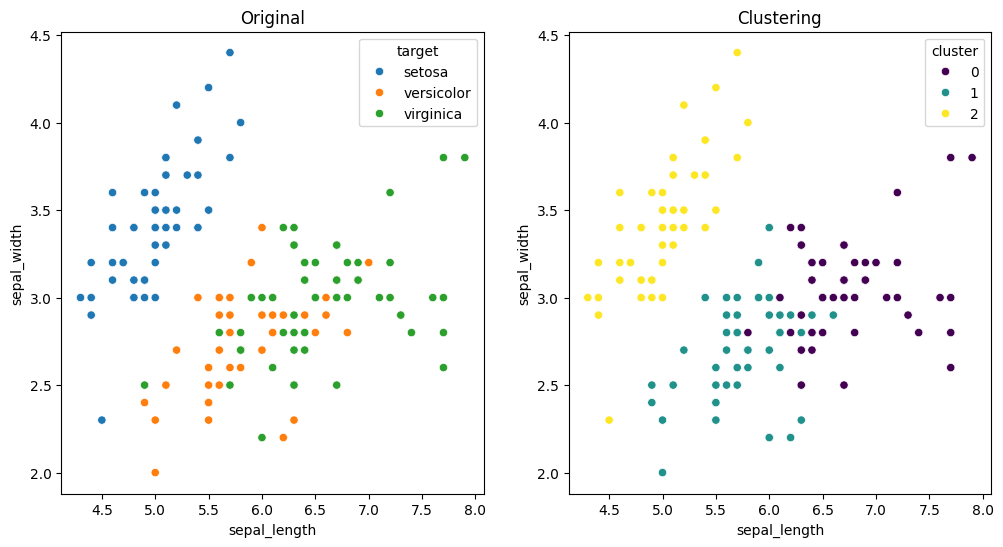

In [27]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.scatterplot(data = iris_df2, x= 'sepal_length', y ='sepal_width', hue='target')
plt.title('Original')

plt.subplot(1,2,2)
sns.scatterplot(data = iris_df2, x= 'sepal_length', y ='sepal_width', hue='cluster', palette='viridis')
plt.title('Clustering')
plt.show()

3.3 RFM 고객 세그멘테이션

In [28]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [30]:
retail_df = pd.read_excel('C:/Users/onlyo/.vscode/ML/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [31]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [32]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [33]:
#데이터 EDA 및 전처리
retail_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [35]:
cond1 = retail_df['Quantity'] < 0
retail_df[cond1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [40]:
#데이터 전처리 전략
# 조건1: customer ID 결측치인 것은 삭제
# 조건2: Invoice가 C로 시작하거나, quantity가 음수이거나, unitprice가 음수인것은 모두 삭제

In [38]:
cond_cust = (retail_df['CustomerID'].notnull())
retail_df[cond_cust].isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [42]:
cond_invo = (retail_df['InvoiceNo'].astype(str).str[0] != 'C')
retail_df[cond_invo]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [45]:
cond_minus = (retail_df['Quantity'] > 0 ) & (retail_df['UnitPrice'] > 0)
retail_df[cond_minus].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [46]:
retail_df_2 = retail_df[cond_cust & cond_invo & cond_minus]
retail_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [47]:
retail_df_2['Country'].value_counts()[:10]

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64

In [50]:
cond_uk = (retail_df_2['Country'] == 'United Kingdom')
retail_df_2 = retail_df_2[cond_uk]
retail_df_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [52]:
retail_df_2.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,354321.0,354321,354321,354321.000000,354321,354321.000000,354321.000000,354321
unique,16646.0,3645,3844,NaN,NaN,NaN,NaN,1
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542.0,1947,1940,NaN,NaN,NaN,NaN,354321
mean,NaN,NaN,NaN,12.013795,2011-07-11 08:04:09.462775296,2.963994,15552.486392,NaN
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:40:00,1.250000,14194.000000,NaN
50%,NaN,NaN,NaN,4.000000,2011-07-31 15:31:00,1.950000,15522.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-23 13:49:00,3.750000,16931.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:49:00,8142.750000,18287.000000,NaN


In [53]:
retail_df_2['Amt'] = retail_df_2['Quantity'] * retail_df_2['UnitPrice']
retail_df_2['Amt'] = retail_df_2['Amt'].astype('int')

In [54]:
retail_df_2[['CustomerID']].drop_duplicates()

,CustomerID
0,17850.0
9,13047.0
46,13748.0
65,15100.0
82,15291.0
...,...
534480,15471.0
536969,13436.0
537255,15520.0
538064,13298.0


In [59]:
retail_df_2.pivot_table(index= 'CustomerID', values= 'Amt', aggfunc='sum').sort_values('Amt', ascending = False)

#손님들이 얼마나 결제했는가? 

,Amt
CustomerID,
18102.0,259500
17450.0,194406
16446.0,168471
17511.0,90741
16029.0,80960
...,...
17956.0,12
16878.0,12
16454.0,6


In [63]:
import datetime as dt

#2011.12.10 기준으로 각 날짜를 빼고 +1
#추후 Customer ID를 기준으로 Period의 최소 Period를 구하면 그것이 Recency
#1번 사람 100일전, 20일전, 5일전

In [68]:
retail_df_2['Period'] = (dt.datetime(2011,12,10) - retail_df_2['InvoiceDate']).apply(lambda x: x.days + 1)
retail_df_2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt,Period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22,374


In [71]:
rfm_df = retail_df_2.groupby('CustomerID').agg({
    'Period': 'min',
    'InvoiceNo' : 'count',
    'Amt' : 'sum'
})
rfm_df

,Period,InvoiceNo,Amt
CustomerID,,,
12346.0,326,1,77183
12747.0,3,103,4143
12748.0,1,4595,31261
12749.0,4,199,3995
12820.0,4,59,916
...,...,...,...
18280.0,278,10,175
18281.0,181,7,78
18282.0,8,12,171


In [73]:
rfm_df.columns = ['Recency','Frequency','Monetary']

<Axes: xlabel='Recency', ylabel='Count'>

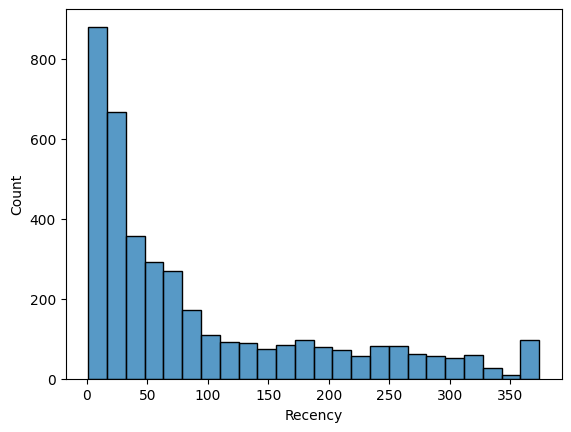

In [74]:
sns.histplot(rfm_df['Recency'])

<Axes: xlabel='Frequency', ylabel='Count'>

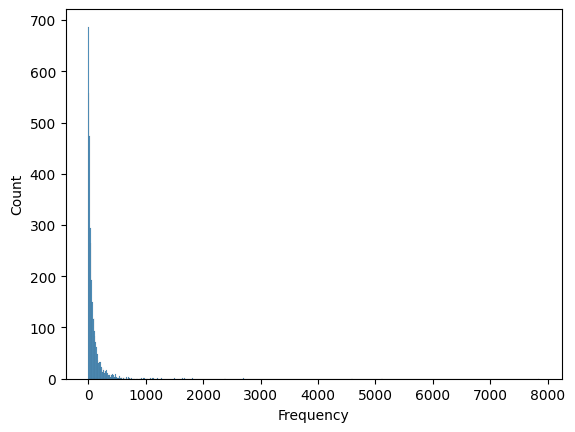

In [75]:
sns.histplot(rfm_df['Frequency'])

<Axes: xlabel='Monetary', ylabel='Count'>

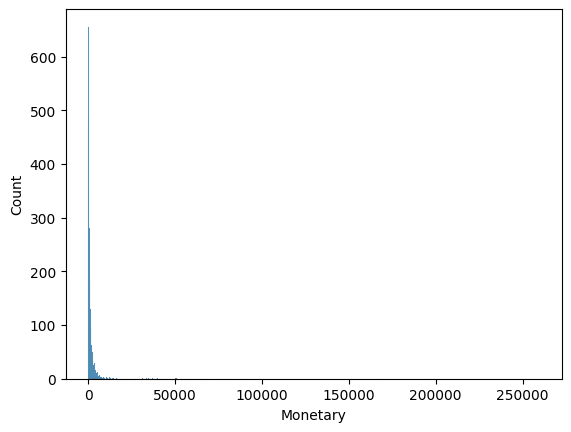

In [76]:
sns.histplot(rfm_df['Monetary'])

In [77]:
#데이터정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_features = sc.fit_transform(rfm_df[['Recency','Frequency','Monetary']])

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters= 3, random_state= 42)
labels = kmeans.fit_predict(X_features)
rfm_df['label'] = labels

silhouette_score(X_features, labels)

np.float64(0.5930190673437187)

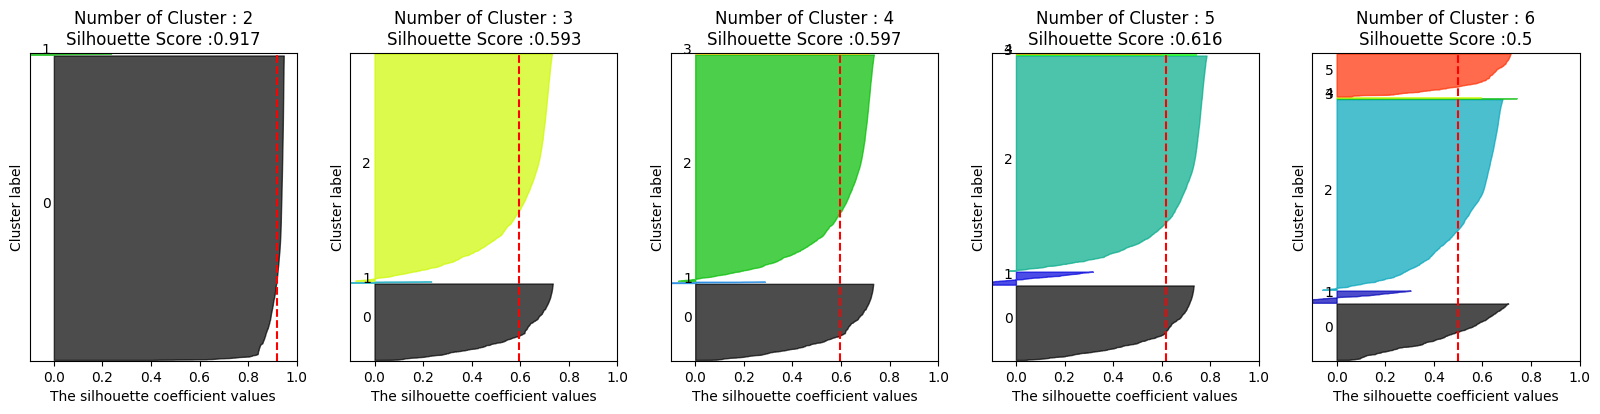

In [85]:
from kmeans_visaul import visualize_silhouette
visualize_silhouette([2,3,4,5,6], X_features)

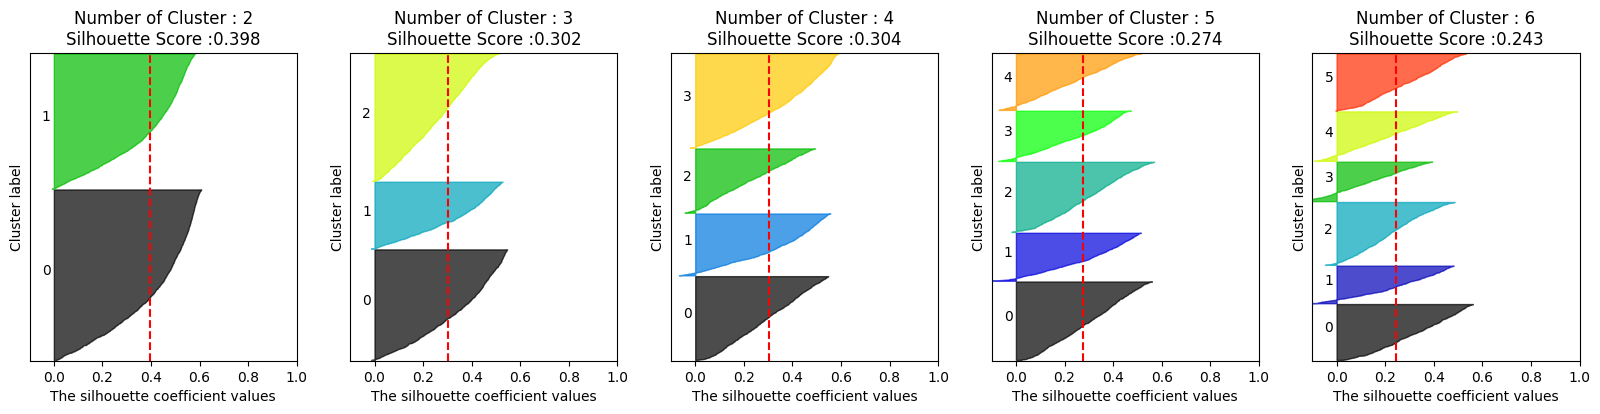

In [90]:
#log 스케일을 통한 추가 전처리

import numpy as np

rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])

X_features2 = rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']]
sc2 = StandardScaler()
X_features2_sc = sc2.fit_transform(X_features2)

visualize_silhouette([2,3,4,5,6], X_features2_sc)